<a href="https://colab.research.google.com/github/irfixq/Avocado_King/blob/main/Avocado_King.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avocado Price Prediction for Avocado King

## System Configuration

In [2]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html

import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('max_rows', 30000)

import matplotlib # collection of functions for scientific and publication-ready visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns # visualizing distributions data
from scipy import stats # visualizing probability distribution of statistical function

import warnings # ignore warnings
warnings.filterwarnings('ignore')

from google.colab import data_table # to show full data table in multiple pages
%load_ext google.colab.data_table


In [3]:
## Check system and python dependencies version
print("Python version: {}". format(sys.version))
print("NumPy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
print("matplotlib version: {}". format(matplotlib.__version__))

Python version: 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
NumPy version: 1.19.5
pandas version: 1.1.5
matplotlib version: 3.2.2


There are 2 options to get the data, either from GitHub or Google Drive.
In this case, I prefer to use Git Clone since it will be easier for user to access the repo instead of loading everything into their Google Drive or local.

In [4]:
## Clone repo from GitHub
! git clone 'https://github.com/irfixq/Avocado_King'

fatal: destination path 'Avocado_King' already exists and is not an empty directory.


In [5]:
## Mount Google Drive to get data
## make sure you uploaded the folder into your Google Drive first

#from google.colab import drive 
#drive.mount('/content/drive')

In [6]:
## get working directory
! pwd

## list all folders in working directory
! ls

/content
Avocado_King  sample_data


In [7]:
## change working directory to github folder
import os
os.chdir('/content/Avocado_King')


In [8]:
## check working directory after change path
! pwd
! ls

/content/Avocado_King
Avocado_King.ipynb	   google-data.csv	       states.csv
df_clean.csv		   outliers.csv		       test.csv
dfnew_price.csv		   Predicted_AveragePrice.csv  train.csv
df_price_NA_check.csv	   price-and-sales-data.csv
feature-explanations.xlsx  README.md


## Data Pre-Processing

1. Data pre-processing steps:
> * Read dataset  as pandas dataframe
> * Check for df dimension (rows, columns)
> * Check for column names and datatype
> * Drop unused column
> * Check for missing values
> * Handle missing values by using mean values (if any)
> * Check for outliers
> * Check for duplicate values
> * Show cleaned dataset (dfnew_price)

2. Data Distribution
> * Visualization
> * Descriptive Statistics

### Dataset: Price and Sales Data

In [62]:
## see the shape of the dataset (rows, columns)
df_price = pd.read_csv('/content/Avocado_King/price-and-sales-data.csv')
df_price.shape

(25161, 13)

##### Check column names

In [63]:
## list all column names
df_price.columns

Index(['Date', 'AveragePrice', 'TotalVolume', '4046', '4225', '4770',
       'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'type', 'year',
       'region'],
      dtype='object')

##### Check datatype

In [64]:
## checking data type of each column
df_price.dtypes

Date             object
AveragePrice    float64
TotalVolume     float64
4046            float64
4225            float64
4770            float64
TotalBags       float64
SmallBags       float64
LargeBags       float64
XLargeBags      float64
type             object
year              int64
region           object
dtype: object

##### Drop unnecessary columns

In [65]:
## drop unused column such as Date because we already have year
df_price = df_price.drop('Date',1)

In [66]:
# TotalBags is a sum of SmallBags, LargeBags and XLargeBags, so we can drop these 3 columns
df_price = df_price.drop(['SmallBags','LargeBags','XLargeBags'],1)

In [67]:
# TotalVolume is a sum of 4046, 4225 and 4770, so we can drop these 3 columns
df_price = df_price.drop(['4046','4225','4770'],1)

In [68]:
## see the dataset
df_price.head(10)

,AveragePrice,TotalVolume,TotalBags,type,year,region
0,1.22,40873.28,9716.46,conventional,2015,Albany
1,1.00,435021.49,46815.79,conventional,2015,Atlanta
2,NaN,788025.06,141136.68,conventional,2015,BaltimoreWashington
3,1.01,80034.32,7755.62,conventional,2015,Boise
4,1.02,491738.00,87663.13,conventional,2015,Boston
5,1.40,116253.44,57182.88,conventional,2015,BuffaloRochester
6,0.93,5777334.90,528451.74,conventional,2015,California
7,1.19,166006.29,50797.56,conventional,2015,Charlotte
8,1.11,783068.03,77539.48,conventional,2015,Chicago
9,0.88,228569.58,NaN,conventional,2015,CincinnatiDayton


##### Check for missing values

In [69]:
## check for missing values in dataset
print(f"Missing data:{df_price.isna().sum(axis=0).any()}") # TRUE represents the dataset has missing data

Missing data:True


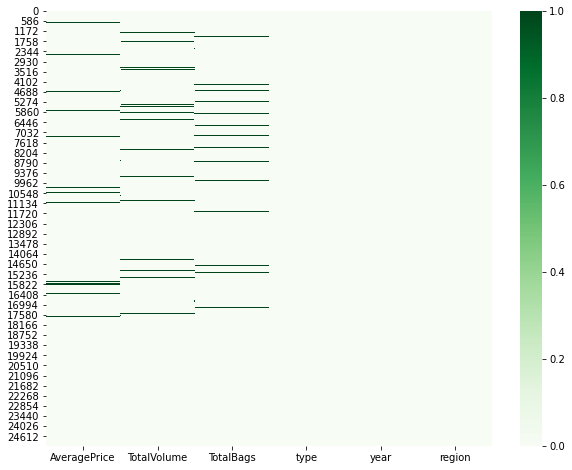

In [70]:
## see distribution of missing values in heat map
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.heatmap(df_price.isna(),cmap='Greens')

Based on heatmap above, 
the dark marks represent missing values in our dataset. Column 'Date', 'type', 'year', 'region' does not have any missing values.

##### Handle missing values

In [71]:
## there are 2 option to handle missing data
# option 1 = eliminate data point that contain missing values (not recommended as you might missed important data for other attribute)
# option 2 = substitue missing value with avg value of the attribute

df_price = df_price.fillna(df_price.mean())

In [72]:
## check for dataset after impute missing values
print(f"Missing data:{df_price.isna().sum(axis=0).any()}")  # FALSE represent there is no missing values anymore in the dataset

Missing data:False


In [74]:
df_price.head(20)

,AveragePrice,TotalVolume,TotalBags,type,year,region
0,1.220000,40873.28,9716.460000,conventional,2015,Albany
1,1.000000,435021.49,46815.790000,conventional,2015,Atlanta
2,1.396018,788025.06,141136.680000,conventional,2015,BaltimoreWashington
3,1.010000,80034.32,7755.620000,conventional,2015,Boise
4,1.020000,491738.00,87663.130000,conventional,2015,Boston
5,1.400000,116253.44,57182.880000,conventional,2015,BuffaloRochester
6,0.930000,5777334.90,528451.740000,conventional,2015,California
7,1.190000,166006.29,50797.560000,conventional,2015,Charlotte
8,1.110000,783068.03,77539.480000,conventional,2015,Chicago
9,0.880000,228569.58,295043.209471,conventional,2015,CincinnatiDayton


In [75]:
## see new dataset after substitue missing values / for download
df_price.to_csv('dfnew_price.csv',sep=',')

##### Check for outliers

In [76]:
## Check for outliers
outliers = df_price.describe()
outliers

,AveragePrice,TotalVolume,TotalBags,year
count,25161.000000,2.516100e+04,2.516100e+04,25161.000000
mean,1.396018,9.170913e+05,2.950432e+05,2016.776877
std,0.377521,3.660879e+06,1.210964e+06,1.323978
min,0.440000,8.456000e+01,0.000000e+00,2015.000000
25%,1.120000,1.400096e+04,7.733600e+03,2016.000000
50%,1.380000,1.363315e+05,5.105029e+04,2017.000000
75%,1.620000,5.638524e+05,1.632409e+05,2018.000000
max,3.250000,6.371614e+07,2.347299e+07,2019.000000


Based on above table, there is no outliers within the dataset because all mean values lie in between min and max values of the distribution.


##### Check for duplicate values

In [77]:
## Check for duplicate values in dataset
print('Duplicated values = ',sum(df_price.duplicated()))

Duplicated values =  0


In [78]:
## Checking each features of the cleaned dataset
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25161 entries, 0 to 25160
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  25161 non-null  float64
 1   TotalVolume   25161 non-null  float64
 2   TotalBags     25161 non-null  float64
 3   type          25161 non-null  object 
 4   year          25161 non-null  int64  
 5   region        25161 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 1.2+ MB


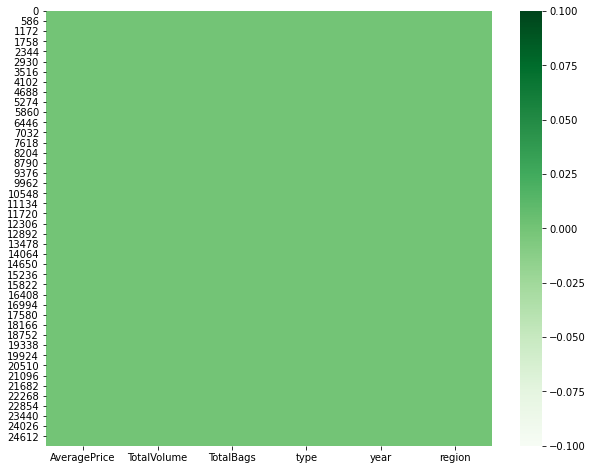

In [79]:
## see distribution of cleaned dataset in heat map
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.heatmap(df_price.isna(),cmap='Greens')

##### Conclusions
* Columns = 6
* Rows = 25,161
* No duplicate values
* No null values after imputing the missing values with mean of the attribute itself
* Features with datatype = 'object' could be the machine learning classifier which are; 'type' & 'region'

### Features Exploration
To understand how the variables are distributed. 

#### Data Distribution

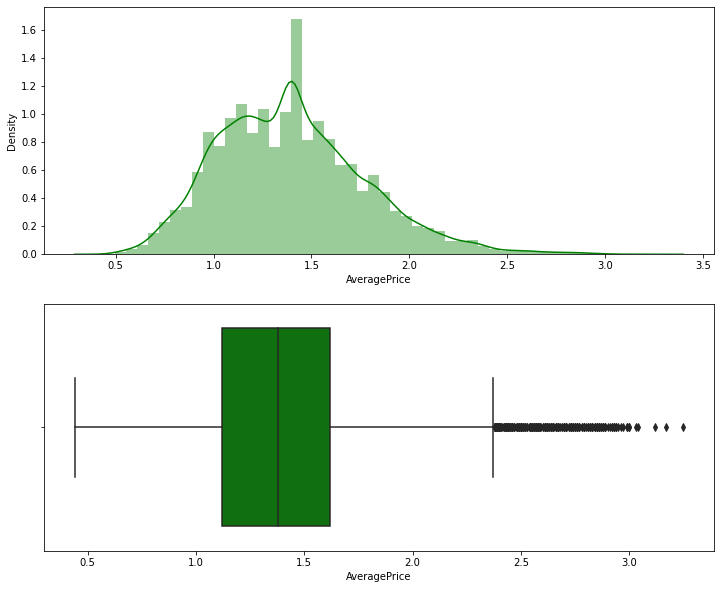

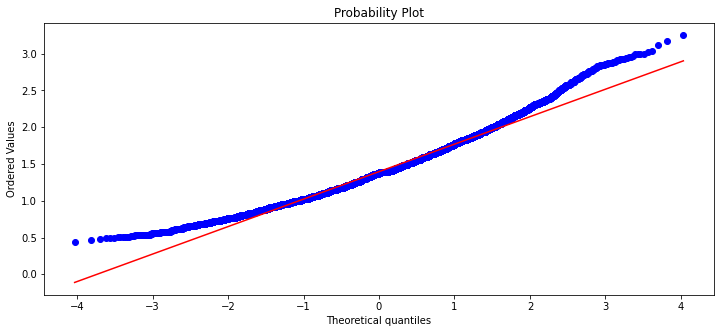

In [80]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,10))
# Univriate distribution plot
# by default the kernel density estimation is TRUE; to see continuous density by smoothing the observation using Gaussian kernel fx
sns.distplot(df_price.AveragePrice, color='green', ax=ax[0])
# Box plot
sns.boxplot(df_price.AveragePrice, color='green',ax=ax[1])

## see probability distribution of avg price
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
# Probability distribution
stats.probplot(df_price['AveragePrice'], plot=ax)
plt.show()

**Conclusions from visualizing the data distribution**

* All 3 plots above showed bimodal distribution which telling us that we have 2 local maximum.
* As discussed earlier, our potential classifier could be Type and Region which in this case Type has 2 class (Organic & Conventional)

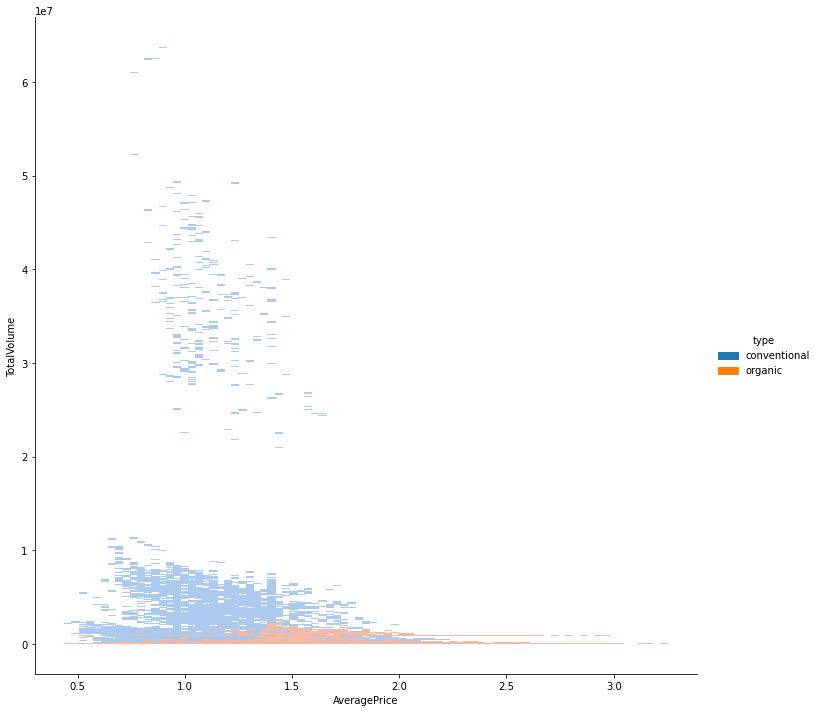

In [81]:
# Bivariate distribution plot of average price against total volume for each avocade type (class: Organic & Conventional)
sns.displot(df_price, x='AveragePrice', y='TotalVolume',hue='type',height=10)

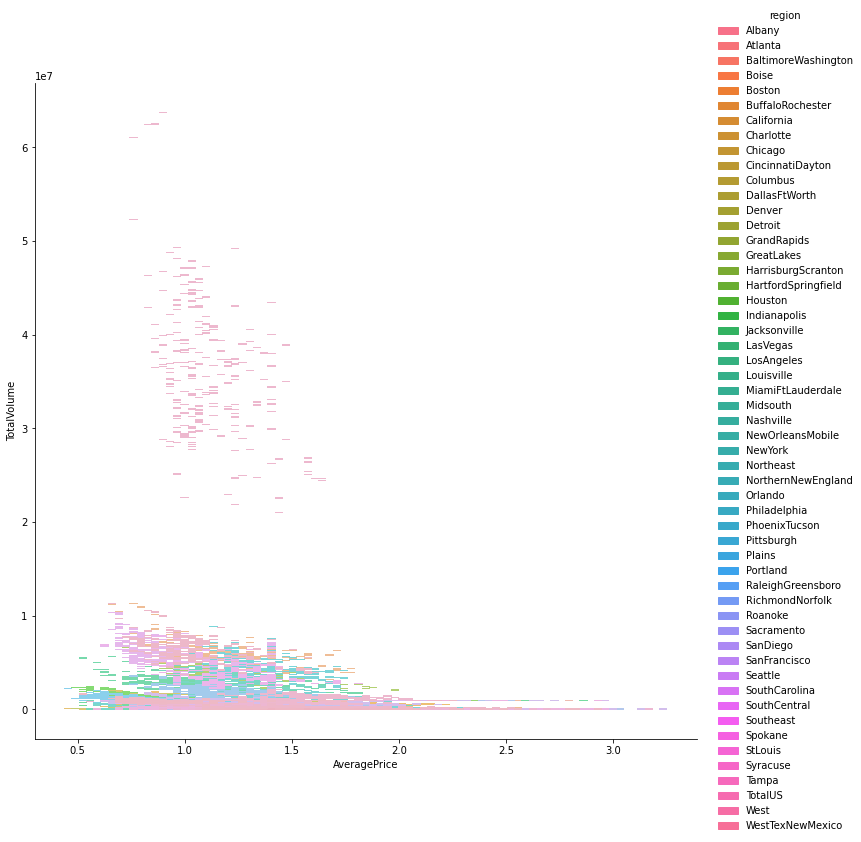

In [82]:
# Bivariate distribution plot of average price against total volume for all region
sns.displot(df_price, x='AveragePrice', y='TotalVolume',hue='region',height=10)

**Conclusions from Bivariate Distribution plot**

* Based on the bivariate distribution plot above, we can see that more conventional avocado has been sold compared to organic avocado.
* Organic avocado was selling at higher price compared to conventional avocado.
* It is better to get dataset about states so that it can be group into region (East, West, South, North) for easier classification.
* class = 'type' seems to have better distribution than class = 'region'. Next, we will see the exact distribution in feature selection.

#### Descriptive Statistics
* Skewness
* Kurtosis

##### Skewness
* Measure of the asymmetry of the probability distribution of a random variable about its mean. In other words, skewness tells you the amount and direction of skew (departure from horizontal symmetry).

In [83]:
print("Skewness: %f" % dfnew_price['AveragePrice'].skew())

Skewness: 0.602213


##### Kurtosis
* Measure the heaviness of distribution tails w.r.t. skewness.

In [84]:
## Kurtosis: Measure heaviness of the distribution tails
print("Kurtosis: %f" % dfnew_price['AveragePrice'].kurt())

Kurtosis: 0.558097


**Conclusions**
* If skewness is 0, the data are perfectly symmetrical, although it is quite unlikely for real-world data.
* If skewness is less than -1 or greater than 1, the distribution is highly skewed.
***If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.**
* If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
***Positive Kurtosis value means more data in the tail of the distribution.**
* Excess kurtosis = kurtosis - 3 = -2.442; which represent that we have lighter tail than normal distribution.

### Features Extraction

#### Class: 'type'


In [86]:
## check on unique value of feature with datatype = object
df_price.type.unique()

array(['conventional', 'organic'], dtype=object)

Conventional Avocado =  (12582, 6)
Organic Avocado =  (12579, 6)



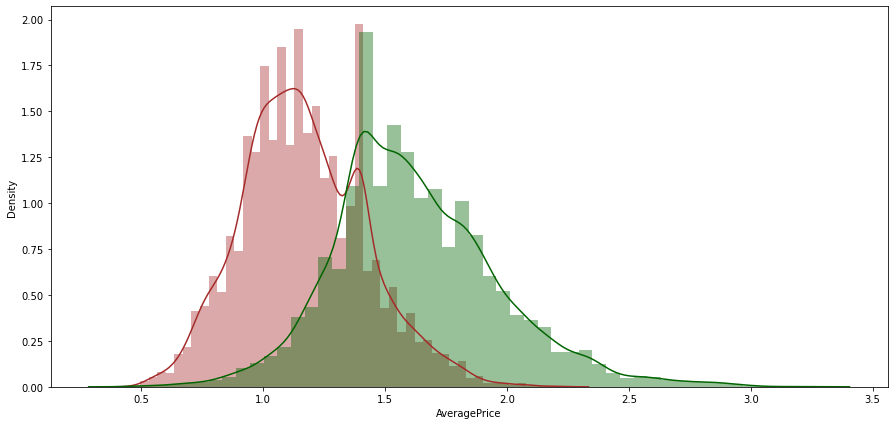

In [87]:
df_conventional = df_price[df_price['type'] == 'conventional']
print("Conventional Avocado = ",df_conventional.shape)

df_organic = df_price[df_price['type'] == 'organic']
print("Organic Avocado = ",df_organic.shape)

print("")
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
sns.distplot(df_conventional['AveragePrice'],color='brown') # conventional avocado
sns.distplot(df_organic['AveragePrice'],color='darkgreen') # organic avocado
plt.show()

Based on class 'type' it shows that the dataset is a balanced dataset. So, it is suitable to be as classifier.

In [88]:
## check for normality for AveragePrice of the CONVENTIONAL avocado dataset
df_conventional['AveragePrice'].describe()

count    12582.000000
mean         1.167764
std          0.252855
min          0.460000
25%          0.990000
50%          1.150000
75%          1.340000
max          2.220000
Name: AveragePrice, dtype: float64

In [89]:
## check for normality for AveragePrice of the ORGANIC avocado dataset
df_organic['AveragePrice'].describe()

count    12579.000000
mean         1.624326
std          0.341897
min          0.440000
25%          1.396018
50%          1.580000
75%          1.820000
max          3.250000
Name: AveragePrice, dtype: float64

Visualize the 'Measure of Spread' calculated for AveragePrice of both class using Boxplot function.
https://www.statisticshowto.com/probability-and-statistics/descriptive-statistics/box-plot/

---



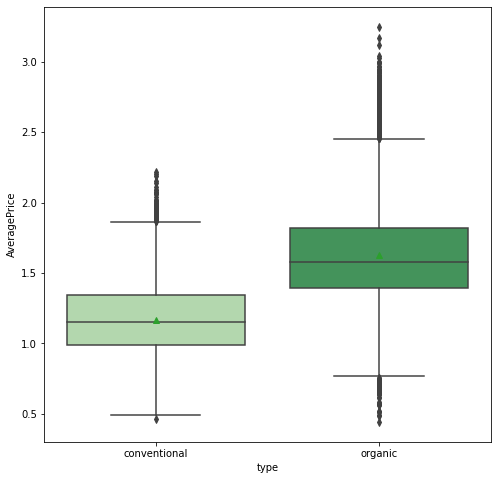

In [90]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
sns.boxplot(x='type',y='AveragePrice',data=df_price,palette='Greens',showmeans=True)
plt.show()

#### Class: 'region'


In [91]:
## check on unique value of feature with datatype = object
df_price.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

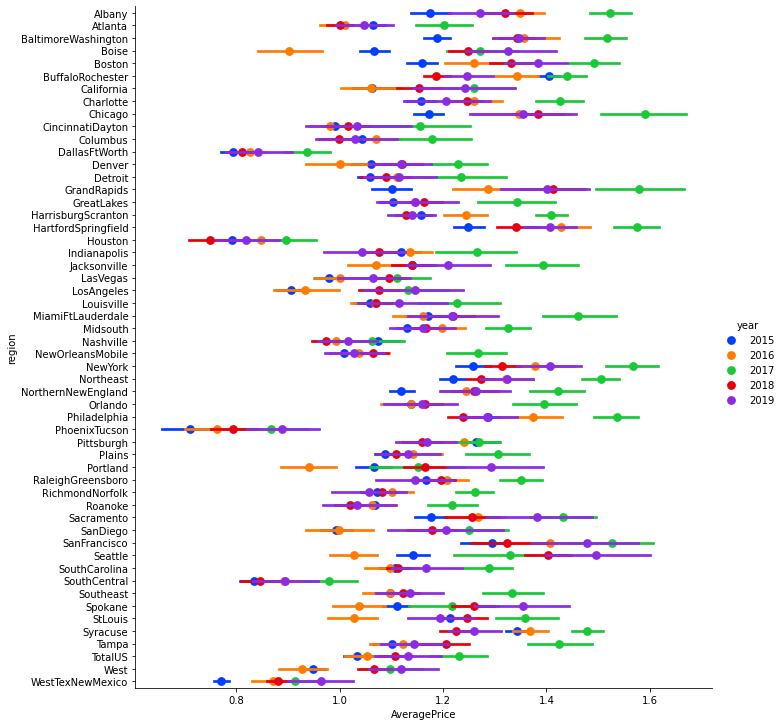

In [92]:
## Average price of CONVENTIONAL avocado in each year by region
conventional = df_price['type']=='conventional'
conv_price_byyear_byregion = sns.factorplot('AveragePrice','region',data=df_price[conventional],hue='year',size=10,palette='bright',join=False)

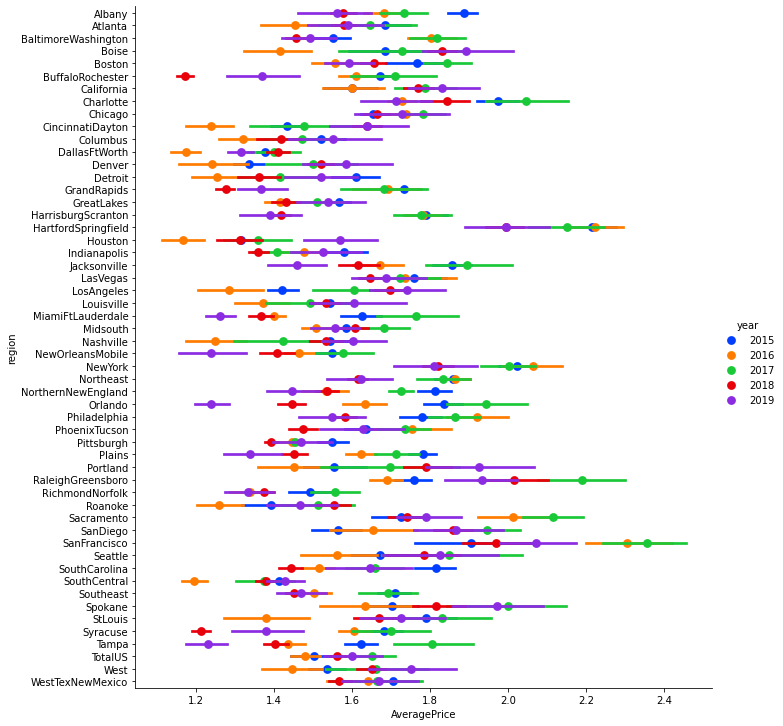

In [93]:
## Average price of ORGANIC avocado in each year by region
organic = df_price['type']=='organic'
organic_price_byyear_byregion = sns.factorplot('AveragePrice','region',data=df_price[organic],hue='year',size=10,palette='bright',join=False)

Text(0.5, 1.0, 'AveragePrice of conventional avocado by region')

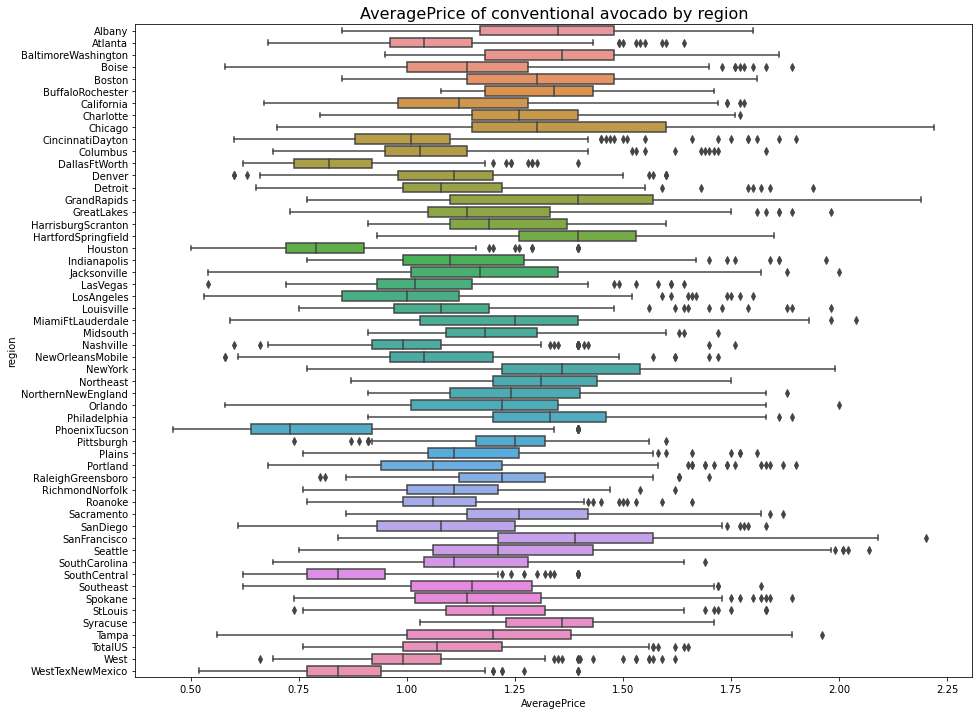

In [94]:
## Average price of conventional avocado by region (average from year 2015-2019)
plt.figure(figsize = (15, 12))
ax = sns.boxplot(y = 'region', x = 'AveragePrice', data = df_price[conventional])
plt.title('AveragePrice of conventional avocado by region', fontsize = 16)

Text(0.5, 1.0, 'AveragePrice of organic avocado by region')

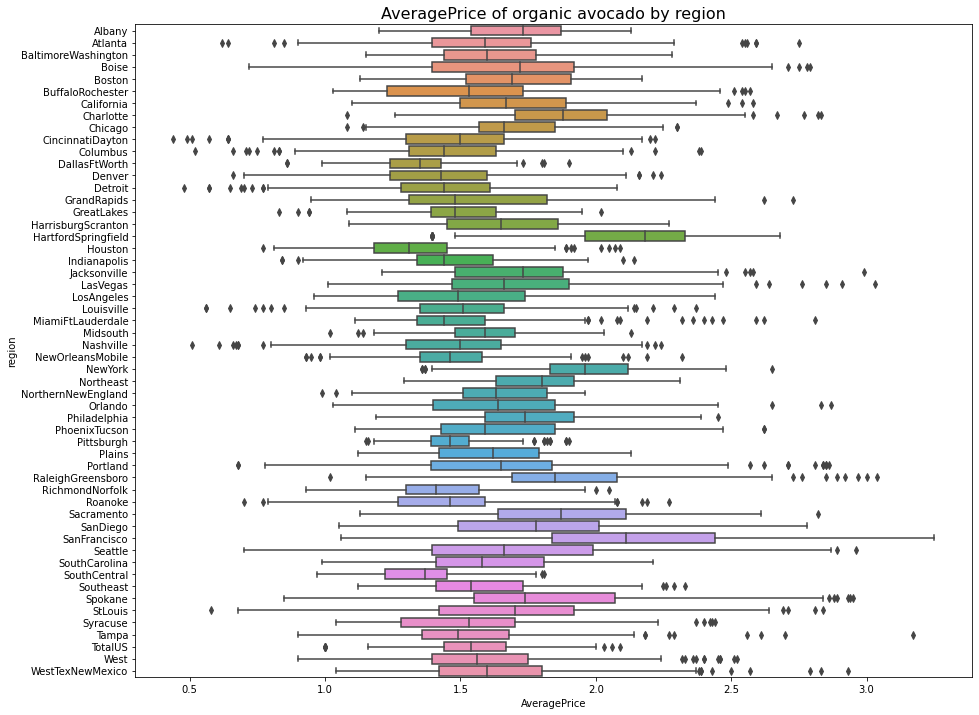

In [95]:
## Average price of organic avocado by region (average from year 2015-2019)
plt.figure(figsize = (15, 12))
ax = sns.boxplot(y = 'region', x = 'AveragePrice', data = df_price[organic])
plt.title('AveragePrice of organic avocado by region', fontsize = 16)

#### Correlation Matrix

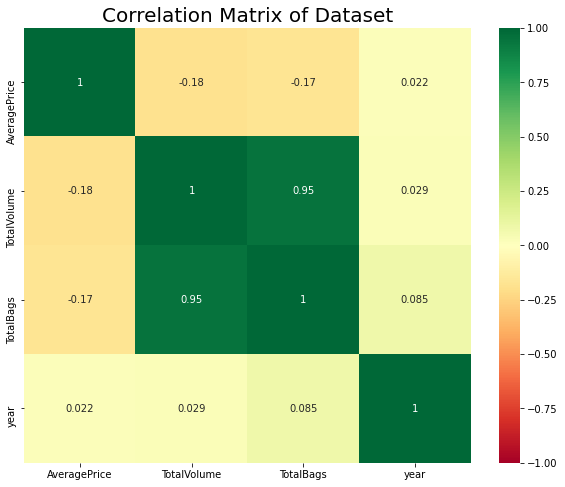

In [96]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
ax.set_title("Correlation Matrix of Dataset", fontsize=20)
sns.heatmap(df_price.corr(), vmin=-1, vmax=1, cmap='RdYlGn', annot=True)

#### Label Encoding
Label Encoding 'type' and 'region' column to convert to numerical data.


In [97]:
from sklearn import preprocessing as pp
le = pp.LabelEncoder()

df_clean = df_price ## reassign as new df before encode

df_clean['region'] = le.fit_transform(df_clean['region'])
df_clean['type'] = le.fit_transform(df_clean['type'])

df_clean.head()

,AveragePrice,TotalVolume,TotalBags,type,year,region
0,1.220000,40873.28,9716.46,0,2015,0
1,1.000000,435021.49,46815.79,0,2015,1
2,1.396018,788025.06,141136.68,0,2015,2
3,1.010000,80034.32,7755.62,0,2015,3
4,1.020000,491738.00,87663.13,0,2015,4


In [98]:
df_clean.type.unique()

array([0, 1])

In [99]:
df_clean.region.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [100]:
## check legend after encodeded the avocado type (just to be sure)

df_type_0 = df_clean[df_clean['type'] == 0]  ## conventional avocado
print("Conventional Avocado / 0 = ",df_type_0.shape)

df_type_1 = df_clean[df_clean['type'] == 1]  ## organic avocado
print("Organic Avocado / 1      = ",df_type_1.shape)

Conventional Avocado / 0 =  (12582, 6)
Organic Avocado / 1      =  (12579, 6)


In [101]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25161 entries, 0 to 25160
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  25161 non-null  float64
 1   TotalVolume   25161 non-null  float64
 2   TotalBags     25161 non-null  float64
 3   type          25161 non-null  int64  
 4   year          25161 non-null  int64  
 5   region        25161 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.2 MB


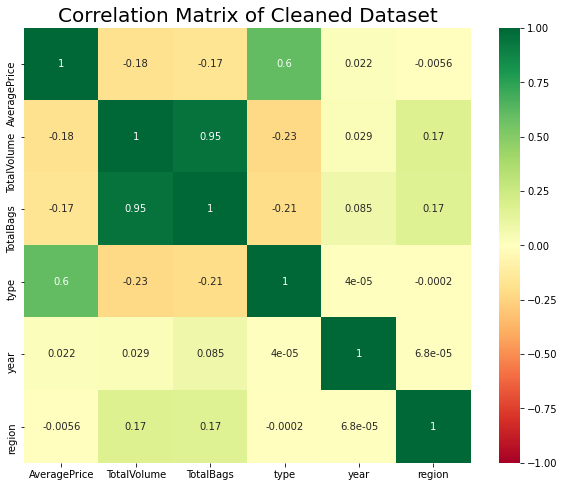

In [102]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
ax.set_title("Correlation Matrix of Cleaned Dataset", fontsize=20)
sns.heatmap(df_clean.corr(), vmin=-1, vmax=1, cmap='RdYlGn', annot=True)

#### Conclusions
* Not only class 'type' that affect the average price but also 'region'.
* AveragePrice for each region is different for every year.
* 'type' shows more balanced data points as compared to 'region'. We will see later whether we will use region or not as classifier.
* 1st correlation matrix shows strong correlation between 'TotalVolume' and 'TotalBags'.

* 2nd correlation matrix shows mild correlation between 'AveragePrice' and 'type'. But it also show other variables correlates well with each other which suggest a **multicollinearity**.


In [103]:
## Save as new .csv table to see whole data / for download
df_clean.to_csv('df_clean.csv',sep=',')

### Dataset: Google Search

In [124]:
# load dataset
df_google = pd.read_csv('/content/Avocado_King/google-data.csv')
df_google.shape

(239, 7)

In [125]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Week                               239 non-null    object
 1   avocado: (United States)           239 non-null    int64 
 2   organic: (United States)           239 non-null    int64 
 3   avocado recipe: (United States)    239 non-null    int64 
 4   avocado toast: (United States)     239 non-null    int64 
 5   avocado sandwich: (United States)  239 non-null    int64 
 6   organic avocado: (United States)   239 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 13.2+ KB


In [126]:
# convert 'Date' column into datetime format
df_google['Week']=pd.to_datetime(df_google['Week'])

# extract year from 'Date' column
df_google['year']=df_google['Week'].apply(lambda x:x.year)

# extract month from 'Date' column
df_google['month']=df_google['Week'].apply(lambda x:x.month)

# extract day from 'Date' column
df_google['day']=df_google['Week'].apply(lambda x:x.day)

In [129]:
# rename columns
df_google.columns=['Date','avocado','organic','avocado_recipe','avocado_toast','avocado_sandwich','organic_avocado','year','month','day']

In [130]:
df_google.head(20)

,Date,avocado,organic,avocado_recipe,avocado_toast,avocado_sandwich,organic_avocado,year,month,day
0,2015-01-04,46,76,84,8,51,10,2015,1,4
1,2015-01-11,48,79,76,8,38,29,2015,1,11
2,2015-01-18,48,82,84,9,66,27,2015,1,18
3,2015-01-25,49,82,89,8,44,28,2015,1,25
4,2015-02-01,52,81,82,7,46,42,2015,2,1
5,2015-02-08,41,80,67,8,60,40,2015,2,8
6,2015-02-15,40,80,61,7,48,17,2015,2,15
7,2015-02-22,41,82,55,8,50,23,2015,2,22
8,2015-03-01,44,83,72,9,38,26,2015,3,1
9,2015-03-08,41,80,66,7,47,31,2015,3,8


Text(0.5, 1.0, 'Google Search distribution')

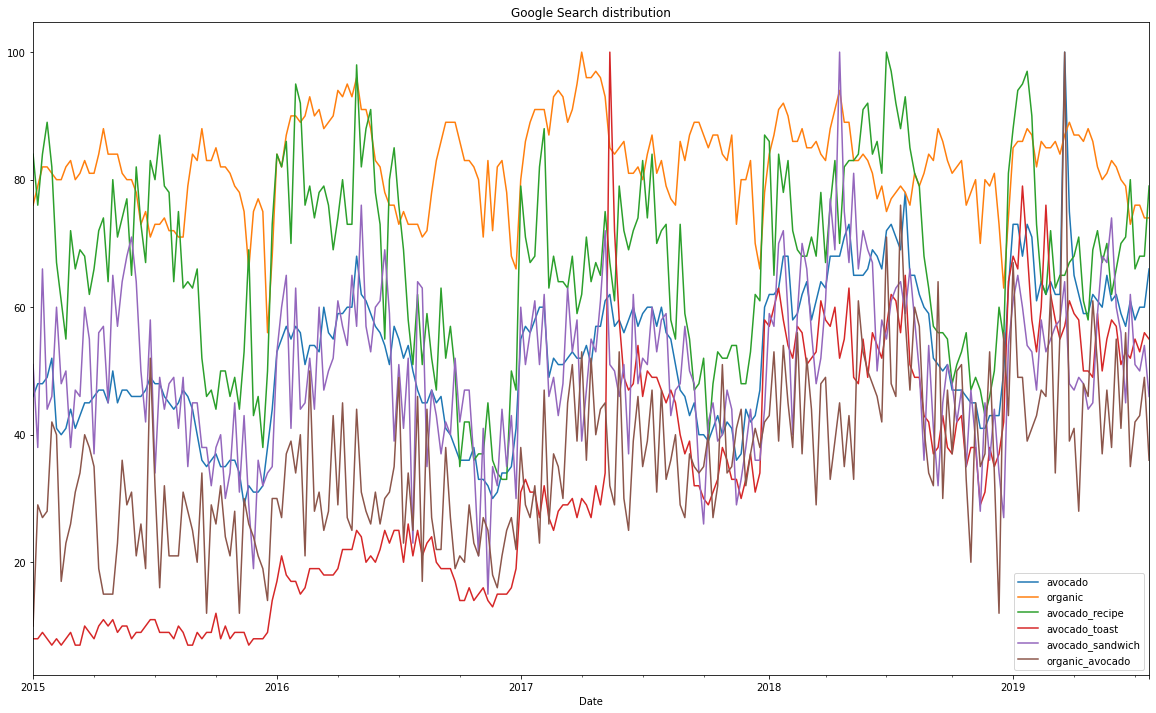

In [141]:
group=df_google.groupby('Date').mean()

plt.figure(figsize=(20,12))

group['avocado'].plot()
group['organic'].plot()
group['avocado_recipe'].plot()
group['avocado_toast'].plot()
group['avocado_sandwich'].plot()
group['organic_avocado'].plot()
plt.legend(loc="bottom right")
plt.title('Google Search distribution')

**Conclusions**
* Google search based on avocado shown increase trending throughout the year (2015-2019)

## Feature Engineering

#### Graphical Analysis

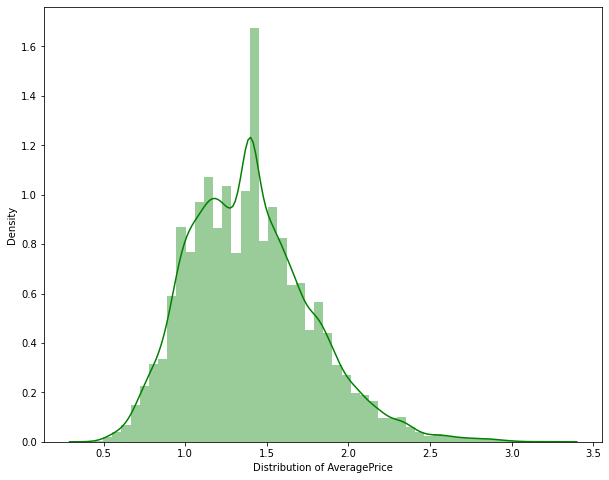

In [104]:
## Distribution of AveragePrice in cleaned dataset
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
sns.distplot(df_clean["AveragePrice"],axlabel="Distribution of AveragePrice", color='green')

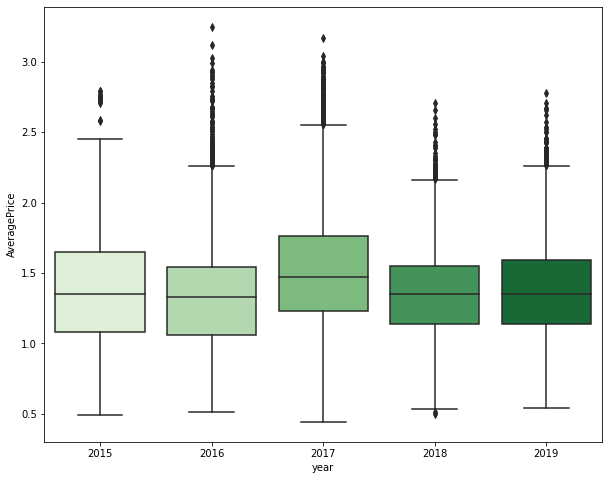

In [105]:
## AveragePrice of avocado each year
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
sns.boxplot(x="year", y="AveragePrice", data=df_clean, palette='Greens')

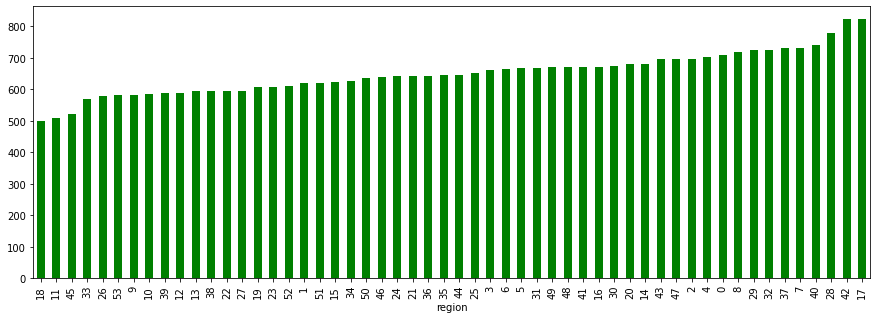

In [106]:
df_clean.groupby("region")["AveragePrice"].sum().sort_values(ascending=True).plot(kind='bar',color='g',figsize=(15,5))

##### Conclusions
* AveragePrice range from USD1.20 to USD1.40
* year=2017 has highest AveragePrice
* AveragePrice is varies according to region 
* region=17 (HartfordSpringfield) has highest count of buying avocado at their AveragePrice.

## Model Selection

train_test_split = https://realpython.com/train-test-split-python-data/

##### Model 1
Based on 2 correlation matrices above, Model 1 is a Linear Regression model and only get important data / features that show strongest correlation.

https://www.kaggle.com/anitha136/avocado-price-prediction/notebook#Avocado-Dataset

In [50]:
## Select columns that will be used to create train and test dataset
model_1 = df_clean[['AveragePrice','TotalVolume','TotalBags','region','type','year']]
model_1.head(10)

,AveragePrice,TotalVolume,TotalBags,region,type,year
0,1.220000,40873.28,9716.460000,0,0,2015
1,1.000000,435021.49,46815.790000,1,0,2015
2,1.396018,788025.06,141136.680000,2,0,2015
3,1.010000,80034.32,7755.620000,3,0,2015
4,1.020000,491738.00,87663.130000,4,0,2015
5,1.400000,116253.44,57182.880000,5,0,2015
6,0.930000,5777334.90,528451.740000,6,0,2015
7,1.190000,166006.29,50797.560000,7,0,2015
8,1.110000,783068.03,77539.480000,8,0,2015
9,0.880000,228569.58,295043.209471,9,0,2015


In [51]:
from sklearn.model_selection import train_test_split

X1=model_1[['AveragePrice','TotalVolume','TotalBags','region','type','year']] 
y1=model_1.type # independent var / predictor

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=1)

print("Shape of each Dataset : ")
print("X Train Shape = ",X1_train.shape)
print("Y Train Shape = ",y1_train.shape)
print("X Test Shape  = ",X1_test.shape)
print("Y Test Shape  = ",y1_test.shape)

Shape of each Dataset : 
X Train Shape =  (20128, 6)
Y Train Shape =  (20128,)
X Test Shape  =  (5033, 6)
Y Test Shape  =  (5033,)


In [52]:
## Standardization of dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(model_1) # compute the mean and std to be used for later scaling.
model_1_std = scaler.transform(model_1) # perform standardization by centering and scaling
model_1 = pd.DataFrame(model_1_std) # convert from array to dataframe
model_1.columns = ['AveragePrice','TotalVolume','TotalBags','region','type','year'] # assign column names
model_1.head(10)

,AveragePrice,TotalVolume,TotalBags,region,type,year
0,-4.662560e-01,-0.239351,-2.356242e-01,-1.700256,-0.999881,-1.342101
1,-1.049017e+00,-0.131684,-2.049874e-01,-1.636088,-0.999881,-1.342101
2,-1.764530e-14,-0.035256,-1.270968e-01,-1.571920,-0.999881,-1.342101
3,-1.022527e+00,-0.228654,-2.372435e-01,-1.507752,-0.999881,-1.342101
4,-9.960384e-01,-0.116191,-1.712555e-01,-1.443583,-0.999881,-1.342101
5,1.054804e-02,-0.218760,-1.964262e-01,-1.379415,-0.999881,-1.342101
6,-1.234440e+00,1.327643,1.927499e-01,-1.315247,-0.999881,-1.342101
7,-5.457234e-01,-0.205169,-2.016993e-01,-1.251078,-0.999881,-1.342101
8,-7.576363e-01,-0.036610,-1.796156e-01,-1.186910,-0.999881,-1.342101
9,-1.366886e+00,-0.188079,1.922727e-15,-1.122742,-0.999881,-1.342101


In [53]:
## create list using feature columns
model_1_features = ['TotalVolume','TotalBags','region','type','year']

# use above list to select subset of original dataframe
X1 = model_1[model_1_features]
y1 = model_1.AveragePrice # dependent variable / output

X1_train, X1_test, y1_train, y1_test=train_test_split(X1, y1, test_size=0.20, random_state=1) 

print("Shape of each New Dataset : ")
print("X Train Shape = ",X1_train.shape)
print("Y Train Shape = ",y1_train.shape)
print("X Test Shape  = ",X1_test.shape)
print("Y Test Shape  = ",y1_test.shape)

Shape of each New Dataset : 
X Train Shape =  (20128, 5)
Y Train Shape =  (20128,)
X Test Shape  =  (5033, 5)
Y Test Shape  =  (5033,)


In [54]:
from sklearn.linear_model import LinearRegression

LR1 = LinearRegression()
LR1.fit(X1_train, y1_train) 

model_1_features.insert(0,'Intercept')
coef = LR1.coef_.tolist()
coef.insert(0, LR1.intercept_)
eq1 = zip(model_1_features, coef)

for model_1_features,coef in eq1:
    print(model_1_features," = " ,coef)

y1_pred_train = LR1.predict(X1_train)
y1_pred_test = LR1.predict(X1_test)

Intercept  =  -0.0001569916618013147
TotalVolume  =  -0.06157404105195766
TotalBags  =  0.012362646092794444
region  =  0.0027895778644772447
type  =  0.5959069531293493
year  =  0.01905266259558269


##### Model 2
Similar Linear Regression model with Model 1 but adding more features to test on accuracy score.

In [55]:
## Select columns that will be used to create train and test dataset
model_2 = df_clean
model_2.head()

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,1.220000,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,0,2015,0
1,1.000000,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,0,2015,1
2,1.396018,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,0,2015,2
3,1.010000,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,0,2015,3
4,1.020000,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,0,2015,4


In [56]:
from sklearn.model_selection import train_test_split

X2=model_2[['AveragePrice','TotalVolume','4046','4225','4770','TotalBags','SmallBags','LargeBags','XLargeBags','type','year','region']] 
y2=model_2.type # independent var / predictor

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=1)

print("Shape of each Dataset : ")
print("X Train Shape = ",X2_train.shape)
print("Y Train Shape = ",y2_train.shape)
print("X Test Shape  = ",X2_test.shape)
print("Y Test Shape  = ",y2_test.shape)

Shape of each Dataset : 
X Train Shape =  (20128, 12)
Y Train Shape =  (20128,)
X Test Shape  =  (5033, 12)
Y Test Shape  =  (5033,)


In [57]:
## Standardization of dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(model_2) # compute the mean and std to be used for later scaling.
model_2_std = scaler.transform(model_2) # perform standardization by centering and scaling
model_2 = pd.DataFrame(model_2_std) # convert from array to dataframe
model_2.columns = ['AveragePrice','TotalVolume','4046','4225','4770','TotalBags','SmallBags','LargeBags','XLargeBags','type','year','region'] # assign column names
model_2.head(10)

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,-4.662560e-01,-0.239351,-0.233410,-0.225308,-0.218166,-2.356242e-01,-2.382569e-01,-2.142479e-01,-0.173745,-0.999881,-1.342101,-1.700256
1,-1.049017e+00,-0.131684,0.052280,-0.229069,-0.217852,-2.049874e-01,-2.294407e-01,-1.301656e-01,-0.173745,-0.999881,-1.342101,-1.636088
2,-1.764530e-14,-0.035256,-0.192970,0.216496,0.170643,-1.270968e-01,-8.824604e-02,-2.044094e-01,-0.173745,-0.999881,-1.342101,-1.571920
3,-1.022527e+00,-0.228654,-0.200419,-0.228107,-0.191861,-2.372435e-01,-2.419176e-01,-2.109454e-01,-0.173745,-0.999881,-1.342101,-1.507752
4,-9.960384e-01,-0.116191,-0.229952,0.084992,-0.217398,-1.712555e-01,-1.465570e-01,-2.150246e-01,-0.173745,-0.999881,-1.342101,-1.443583
5,1.054804e-02,-0.218760,-0.233055,-0.202229,-0.217585,-1.964262e-01,-1.819896e-01,-2.157532e-01,-0.173745,-0.999881,-1.342101,-1.379415
6,-1.234440e+00,1.327643,2.011770,1.660646,1.119517,1.927499e-01,3.104029e-01,-7.964094e-02,-0.040614,-0.999881,-1.342101,-1.315247
7,-5.457234e-01,-0.205169,-0.212387,-0.209363,0.156762,-2.016993e-01,1.364776e-15,1.613261e-15,-0.173745,-0.999881,-1.342101,-1.251078
8,-7.576363e-01,-0.036610,-0.211715,0.214682,0.993238,-1.796156e-01,-1.635774e-01,-2.025321e-01,-0.173745,-0.999881,-1.342101,-1.186910
9,-1.366886e+00,-0.188079,-0.233050,-0.107006,-0.204566,1.922727e-15,-2.284815e-01,-1.093097e-01,-0.169302,-0.999881,-1.342101,-1.122742


In [58]:
## create list using feature columns
model_2_features = ['TotalVolume','4046','4225','4770','TotalBags','SmallBags','LargeBags','XLargeBags','type','year','region']

# use above list to select subset of original dataframe
X2 = model_2[model_2_features]
y2 = model_2.AveragePrice # dependent variable / output

X2_train, X2_test, y2_train, y2_test=train_test_split(X2, y2, test_size=0.20, random_state=1) 

print("Shape of each New Dataset : ")
print("X Train Shape = ",X2_train.shape)
print("Y Train Shape = ",y2_train.shape)
print("X Test Shape  = ",X2_test.shape)
print("Y Test Shape  = ",y2_test.shape)

Shape of each New Dataset : 
X Train Shape =  (20128, 11)
Y Train Shape =  (20128,)
X Test Shape  =  (5033, 11)
Y Test Shape  =  (5033,)


In [59]:
from sklearn.linear_model import LinearRegression

LR2 = LinearRegression()
LR2.fit(X2_train, y2_train) 

model_2_features.insert(0,'Intercept')
coef = LR2.coef_.tolist()
coef.insert(0, LR2.intercept_)
eq2 = zip(model_2_features, coef)

for model_2_features,coef in eq1:
    print(model_2_features," = " ,coef)

y2_pred_train = LR2.predict(X2_train)
y2_pred_test = LR2.predict(X2_test)

#### Model 3
Random Forest

https://github.com/Mdkhalidsiddique/Avocado_price_prediction/blob/master/Model%20selection%20and%20tuning.ipynb

In [60]:
## Select columns that will be used to create train and test dataset
model_3 = df_clean
model_3.head()

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,1.220000,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,0,2015,0
1,1.000000,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,0,2015,1
2,1.396018,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,0,2015,2
3,1.010000,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,0,2015,3
4,1.020000,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,0,2015,4


In [61]:
from sklearn.model_selection import train_test_split

X3=model_3[['AveragePrice','TotalVolume','4046','4225','4770','TotalBags','SmallBags','LargeBags','XLargeBags','type','year','region']] 
y3=model_3.type # independent var / predictor

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.20, random_state=1)

print("Shape of each Dataset : ")
print("X Train Shape = ",X3_train.shape)
print("Y Train Shape = ",y3_train.shape)
print("X Test Shape  = ",X3_test.shape)
print("Y Test Shape  = ",y3_test.shape)

Shape of each Dataset : 
X Train Shape =  (20128, 12)
Y Train Shape =  (20128,)
X Test Shape  =  (5033, 12)
Y Test Shape  =  (5033,)


In [62]:
## Standardization of dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(model_3) # compute the mean and std to be used for later scaling.
model_3_std = scaler.transform(model_3) # perform standardization by centering and scaling
model_3 = pd.DataFrame(model_3_std) # convert from array to dataframe
model_3.columns = ['AveragePrice','TotalVolume','4046','4225','4770','TotalBags','SmallBags','LargeBags','XLargeBags','type','year','region'] # assign column names
model_3.head(10)

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,-4.662560e-01,-0.239351,-0.233410,-0.225308,-0.218166,-2.356242e-01,-2.382569e-01,-2.142479e-01,-0.173745,-0.999881,-1.342101,-1.700256
1,-1.049017e+00,-0.131684,0.052280,-0.229069,-0.217852,-2.049874e-01,-2.294407e-01,-1.301656e-01,-0.173745,-0.999881,-1.342101,-1.636088
2,-1.764530e-14,-0.035256,-0.192970,0.216496,0.170643,-1.270968e-01,-8.824604e-02,-2.044094e-01,-0.173745,-0.999881,-1.342101,-1.571920
3,-1.022527e+00,-0.228654,-0.200419,-0.228107,-0.191861,-2.372435e-01,-2.419176e-01,-2.109454e-01,-0.173745,-0.999881,-1.342101,-1.507752
4,-9.960384e-01,-0.116191,-0.229952,0.084992,-0.217398,-1.712555e-01,-1.465570e-01,-2.150246e-01,-0.173745,-0.999881,-1.342101,-1.443583
5,1.054804e-02,-0.218760,-0.233055,-0.202229,-0.217585,-1.964262e-01,-1.819896e-01,-2.157532e-01,-0.173745,-0.999881,-1.342101,-1.379415
6,-1.234440e+00,1.327643,2.011770,1.660646,1.119517,1.927499e-01,3.104029e-01,-7.964094e-02,-0.040614,-0.999881,-1.342101,-1.315247
7,-5.457234e-01,-0.205169,-0.212387,-0.209363,0.156762,-2.016993e-01,1.364776e-15,1.613261e-15,-0.173745,-0.999881,-1.342101,-1.251078
8,-7.576363e-01,-0.036610,-0.211715,0.214682,0.993238,-1.796156e-01,-1.635774e-01,-2.025321e-01,-0.173745,-0.999881,-1.342101,-1.186910
9,-1.366886e+00,-0.188079,-0.233050,-0.107006,-0.204566,1.922727e-15,-2.284815e-01,-1.093097e-01,-0.169302,-0.999881,-1.342101,-1.122742


In [63]:
## create list using feature columns
model_3_features = ['TotalVolume','4046','4225','4770','TotalBags','SmallBags','LargeBags','XLargeBags','type','year','region']

# use above list to select subset of original dataframe
X3 = model_3[model_3_features]
y3 = model_3.AveragePrice # dependent variable / output

X3_train, X3_test, y3_train, y3_test=train_test_split(X3, y3, test_size=0.20, random_state=1) 

print("Shape of each New Dataset : ")
print("X Train Shape = ",X3_train.shape)
print("Y Train Shape = ",y3_train.shape)
print("X Test Shape  = ",X3_test.shape)
print("Y Test Shape  = ",y3_test.shape)

Shape of each New Dataset : 
X Train Shape =  (20128, 11)
Y Train Shape =  (20128,)
X Test Shape  =  (5033, 11)
Y Test Shape  =  (5033,)


In [64]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(X3_train, y3_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [65]:
y3_pred_train = RF.predict(X3_train)
y3_pred_test = RF.predict(X3_test)

## Evaluation Methods


In [66]:
from sklearn import metrics

#### Model 1

##### Root Mean Square Error (RMSE)

In [67]:
print("Model Evaluation for Linear Regression Model 1 using RMSE")
print("")
RMSE_train_1 = np.sqrt( metrics.mean_squared_error(y1_train, y1_pred_train))
RMSE_test_1 = np.sqrt(metrics.mean_squared_error(y1_test, y1_pred_test))
print('RMSE for training set = {}'.format(round(RMSE_train_1,2)))
print('RMSE for test set = {}'.format(round(RMSE_test_1,2)))

Model Evaluation for Linear Regression Model 1 using RMSE

RMSE for training set = 0.8
RMSE for test set = 0.79


##### R-square (R2)

In [68]:
print("Model 1 - R2 score for TRAINING dataset")
print("")

yhat_1 = LR1.predict(X1_train)
SS_Residual_1 = sum((y1_train-yhat_1)**2)
SS_Total_1 = sum((y1_train-np.mean(y1_train))**2)
r_squared_1 = 1 - (float(SS_Residual_1))/SS_Total_1
print("R2 score          = ",round(r_squared_1,5))

Model 1 - R2 score for TRAINING dataset

R2 score          =  0.36926
Adjusted R2 score =  0.36911


In [69]:
print("Model 1 - R2 score for TEST dataset")
print("")

yhat_1 = LR1.predict(X1_test)
SS_Residual_1 = sum((y1_test-yhat_1)**2)
SS_Total_1 = sum((y1_test-np.mean(y1_test))**2)
r_squared_1 = 1 - (float(SS_Residual_1))/SS_Total_1
print("R2 score          = ",round(r_squared_1,5))

Model 1 - R2 score for TEST dataset

R2 score          =  0.36416
Adjusted R2 score =  0.36353


In [70]:
# Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF_1 = (1/(1-r_squared_1))
VIF_1

1.5727251468662764

##### Accuracy

In [71]:
## acuracy score
train_score_1 = LR1.score(X1_train, y1_train)
test_score_1 = LR1.score(X1_test, y1_test)

print("Model 1 accuracy score: ")
print("")
print("Train Score = ",round(train_score_1*100,0),"%")
print("Test Score  = ",round(test_score_1*100,0), "%")

Model 1 accuracy score: 

Train Score =  37.0 %
Test Score  =  36.0 %


#### Model 2

##### Root Mean Square Error (RMSE)

In [72]:
print("Model Evaluation for Linear Regression Model 2 using RMSE")
print("")
RMSE_train_2 = np.sqrt( metrics.mean_squared_error(y2_train, y2_pred_train))
RMSE_test_2 = np.sqrt(metrics.mean_squared_error(y2_test, y2_pred_test))
print('RMSE for training set = {}'.format(round(RMSE_train_2,2)))
print('RMSE for test set = {}'.format(round(RMSE_test_2,2)))

Model Evaluation for Linear Regression Model 2 using RMSE

RMSE for training set = 0.79
RMSE for test set = 0.78


##### R-square (R2)

In [73]:
print("Model 2 -  R2 score for TRAINING dataset")
print("")

yhat_2 = LR2.predict(X2_train)
SS_Residual_2 = sum((y2_train-yhat_2)**2)
SS_Total_2 = sum((y2_train-np.mean(y2_train))**2)
r_squared_2 = 1 - (float(SS_Residual_2))/SS_Total_2
print("R2 score          = ",round(r_squared_2,5))

Model 2 -  R2 score for TRAINING dataset

R2 score          =  0.38058
Adjusted R2 score =  0.38024


In [74]:
print("Model 2 - R2 score for TEST dataset")
print("")

yhat_2 = LR2.predict(X2_test)
SS_Residual_2 = sum((y2_test-yhat_2)**2)
SS_Total_2 = sum((y2_test-np.mean(y2_test))**2)
r_squared_2 = 1 - (float(SS_Residual_2))/SS_Total_2
print("R2 score          = ",round(r_squared_2,5))

Model 2 - R2 score for TEST dataset

R2 score          =  0.37775
Adjusted R2 score =  0.37639


##### Accuracy

In [75]:
## acuracy score
train_score_2 = LR2.score(X2_train, y2_train)
test_score_2 = LR2.score(X2_test, y2_test)

print("Model 2 accuracy score: ")
print("")
print("Train Score = ",round(train_score_2*100,0),"%")
print("Test Score  = ",round(test_score_2*100,0), "%")

Model 2 accuracy score: 

Train Score =  38.0 %
Test Score  =  38.0 %


#### Model 3

##### Root Mean Square Error (RMSE)

In [76]:
print("Model Evaluation for Random Forest Model 3 using RMSE")

RMSE_train_3 = np.sqrt( metrics.mean_squared_error(y3_train, y3_pred_train))
RMSE_test_3 = np.sqrt(metrics.mean_squared_error(y3_test, y3_pred_test))
print('RMSE for training set is {}'.format(round(RMSE_train_3,2)))
print('RMSE for test set is {}'.format(round(RMSE_test_3,2)))

Model Evaluation for Random Forest Model 3 using RMSE
RMSE for training set is 0.18
RMSE for test set is 0.47


##### R-square (R2)

In [77]:
print("Model 3 -  R2 score for TRAINING dataset")
print("")

yhat_3 = RF.predict(X3_train)
SS_Residual_3 = sum((y3_train-yhat_3)**2)
SS_Total_3 = sum((y3_train-np.mean(y3_train))**2)
r_squared_3 = 1 - (float(SS_Residual_3))/SS_Total_3
print("R2 score          = ",round(r_squared_3,5))

Model 3 -  R2 score for TRAINING dataset

R2 score          =  0.96789
Adjusted R2 score =  0.96787


In [78]:
print("Model 3 - R2 score for TEST dataset")
print("")

yhat_3 = RF.predict(X3_test)
SS_Residual_3 = sum((y3_test-yhat_3)**2)
SS_Total_3 = sum((y3_test-np.mean(y3_test))**2)
r_squared_3 = 1 - (float(SS_Residual_3))/SS_Total_3
print("R2 score          = ",round(r_squared_3,5))

Model 3 - R2 score for TEST dataset

R2 score          =  0.77425
Adjusted R2 score =  0.37639


##### Accuracy

In [79]:
## acuracy score
train_score_3 = RF.score(X3_train, y3_train)
test_score_3 = RF.score(X3_test, y3_test)

print("Model 2 accuracy score: ")
print("")
print("Train Score = ",round(train_score_3*100,0),"%")
print("Test Score  = ",round(test_score_3*100,0), "%")

Model 2 accuracy score: 

Train Score =  97.0 %
Test Score  =  77.0 %


#### Conclusions
* Model 1 give quite low accuracy value = approx 36%-37% for training and test.
* Model 2 shows minor improvement in accuracy value = approx 38% for both training and test.
* The accuracy has increased after incorporate all columns for training in Model 2.
* Model 3 shows the best accuracy among all 3 models = approx 97% for training and 77% for test.
* Model 3 can be used to predict the prices of avocados and the number of avocados sold.

## Validation

In [127]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

##### Model 2

In [141]:
X2_trainval, X2_testval, y2_trainval, y2_testval = train_test_split(X2_train,y2_train, test_size=0.20)
print('Shape of training dataset = ', X2_trainval.shape, y2_trainval.shape)
print('Shape of test dataset = ', X2_testval.shape, y2_testval.shape)

Shape of training dataset =  (8243, 11) (8243,)
Shape of test dataset =  (2061, 11) (2061,)


In [142]:
kf = KFold(n_splits=5) # Define the split - into 5 folds 
kf.get_n_splits(X2) # returns the number of splitting iterations in the cross-validator
print(kf) 

KFold(n_splits=5, random_state=None, shuffle=False)


Text(0, 0.5, 'Predictions')

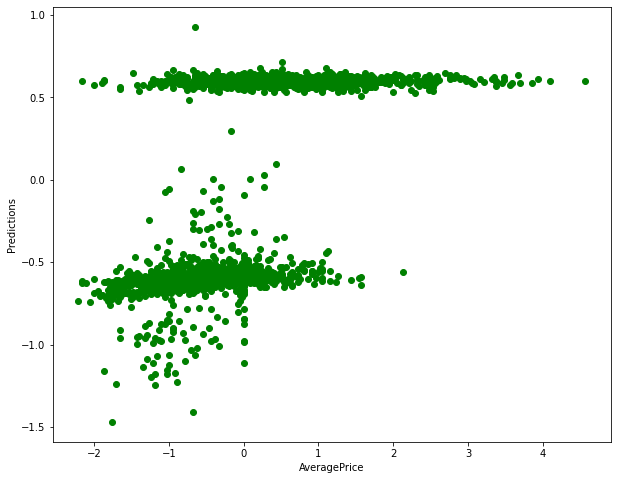

In [143]:
model_2 = LR2.fit(X2_trainval, y2_trainval)
predictions_2 = LR2.predict(X2_testval)
predictions_2

## Prediction model 2 plot
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
plt.scatter(y2_testval, predictions_2,c='g')
plt.xlabel('AveragePrice')
plt.ylabel('Predictions')

In [144]:
## Check for accuracy
print ('Accuracy score of Linear Regression model = ', round(model_2.score(X2_testval, y2_testval),2)*100,"%")

Accuracy score of Linear Regression model =  35.0 %


##### Model 3

In [145]:
X3_trainval, X3_testval, y3_trainval, y3_testval = train_test_split(X3_train,y3_train, test_size=0.20)
print('Shape of training dataset = ', X3_trainval.shape, y3_trainval.shape)
print('Shape of test dataset = ', X3_testval.shape, y3_trainval.shape)

Shape of training dataset =  (12881, 11) (12881,)
Shape of test dataset =  (3221, 11) (3221,)


In [147]:
kf = KFold(n_splits=5) # Define the split - into 5 folds 
kf.get_n_splits(X3) # returns the number of splitting iterations in the cross-validator
print(kf) 

KFold(n_splits=5, random_state=None, shuffle=False)


Text(0, 0.5, 'Predictions')

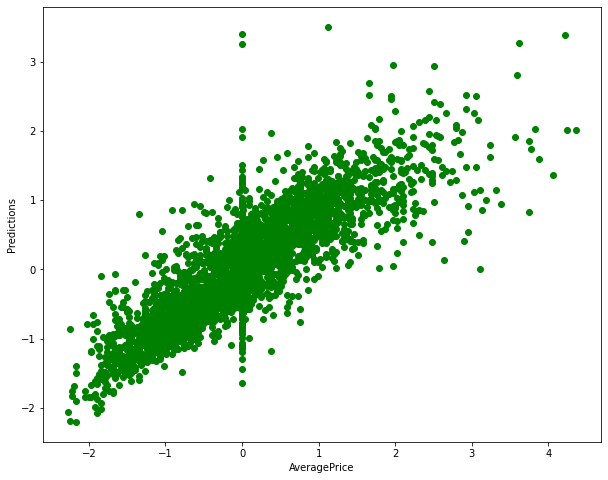

In [148]:
model_3 = RF.fit(X3_trainval, y3_trainval)
predictions_3 = RF.predict(X3_testval)
predictions_3

## Prediction model 2 plot
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
plt.scatter(y3_testval, predictions_3,c='g')
plt.xlabel('AveragePrice')
plt.ylabel('Predictions')

In [149]:
## Check for accuracy
print ('Accuracy score of Random Forest model = ', round(model_3.score(X3_testval, y3_testval),2)*100,"%")

Accuracy score of Random Forest model =  74.0 %


**Conclusion**
* 

## Prediction: AveragePrice of avocado
We have selected Model 3 as our prediction model. Hence, we will use the test dataset generated from model 3.

In [147]:

print("Shape of each Dataset : ")
print("X Train Shape = ",X3_train.shape)
print("Y Train Shape = ",y3_train.shape)
print("X Test Shape  = ",X3_test.shape)
print("Y Test Shape  = ",y3_test.shape)

Shape of each Dataset : 
X Train Shape =  (20128, 11)
Y Train Shape =  (20128,)
X Test Shape  =  (5033, 11)
Y Test Shape  =  (5033,)


In [149]:
X3_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20128 entries, 18806 to 235
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TotalVolume  20128 non-null  float64
 1   4046         20128 non-null  float64
 2   4225         20128 non-null  float64
 3   4770         20128 non-null  float64
 4   TotalBags    20128 non-null  float64
 5   SmallBags    20128 non-null  float64
 6   LargeBags    20128 non-null  float64
 7   XLargeBags   20128 non-null  float64
 8   type         20128 non-null  float64
 9   year         20128 non-null  float64
 10  region       20128 non-null  float64
dtypes: float64(11)
memory usage: 1.8 MB


In [150]:
X3_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5033 entries, 11340 to 16666
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TotalVolume  5033 non-null   float64
 1   4046         5033 non-null   float64
 2   4225         5033 non-null   float64
 3   4770         5033 non-null   float64
 4   TotalBags    5033 non-null   float64
 5   SmallBags    5033 non-null   float64
 6   LargeBags    5033 non-null   float64
 7   XLargeBags   5033 non-null   float64
 8   type         5033 non-null   float64
 9   year         5033 non-null   float64
 10  region       5033 non-null   float64
dtypes: float64(11)
memory usage: 471.8 KB


In [156]:
X3_train_new = X3_train.drop('region',1)
X3_test_new =  X3_test.drop('region',1)

In [159]:
X3_train_new.to_csv('train.csv', index=False)
X3_test_new.to_csv('test.csv', index=False)

In [160]:
df_test = pd.read_csv('/content/Avocado_King/test.csv')
df_test.head(50)

,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year
0,-8.619553e-02,-1.492708e-02,-1.836464e-01,-2.155429e-01,-0.041984,1.364776e-15,-1.195980e-02,-1.737449e-01,-0.999881,0.168528
1,1.067386e+00,5.070262e-01,1.164506e+00,5.615248e+00,1.083353,1.031098e+00,9.529099e-01,3.921837e+00,-0.999881,0.923843
2,-2.498804e-01,-2.355567e-01,-2.490831e-01,-2.186514e-01,-0.241857,-2.464922e-01,1.613261e-15,-1.737449e-01,1.000119,0.168528
3,-2.053203e-01,-1.746942e-01,-2.201060e-01,-2.146285e-01,-0.199498,-2.194597e-01,-1.477635e-01,-3.191177e-03,-0.999881,-0.586787
4,-2.489965e-01,-2.353604e-01,-2.491300e-01,-2.186514e-01,-0.239344,-2.429165e-01,-2.157532e-01,-1.737449e-01,1.000119,1.679158
5,-2.386975e-01,-2.346104e-01,-2.353704e-01,-2.181874e-01,-0.222524,-2.459318e-01,-1.505453e-01,-1.737449e-01,1.000119,0.923843
6,-2.862041e-16,-2.356327e-01,-2.457721e-01,-2.165645e-01,-0.239638,-2.433346e-01,-2.157532e-01,-1.737449e-01,1.000119,0.168528
7,-2.862041e-16,-2.352192e-01,-2.490911e-01,-2.186514e-01,-0.242975,-2.482861e-01,-2.152333e-01,-1.737449e-01,1.000119,-1.342101
8,2.645073e-01,4.407348e-01,3.794585e-02,-1.538699e-01,0.319587,4.348577e-01,3.077428e-02,2.981216e-01,-0.999881,0.923843
9,9.844750e-02,2.843290e-01,-6.964418e-02,6.226791e-01,0.020616,1.007565e-01,-1.956250e-01,4.005409e-01,-0.999881,-0.586787


In [183]:
X=df_clean.drop('AveragePrice',1)
y=df_clean['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [184]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(X_train,y_train)
pred=RF.predict(X_test)

In [185]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.1252922880463445
MSE: 0.03224764673188621
RMSE: 0.17957629780092418


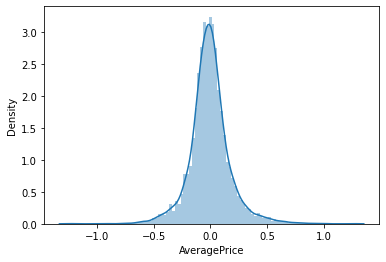

In [187]:
sns.distplot((y_test-pred),bins=100)

,AveragePrice,Predicted AveragePrice
22511,1.16,1.239560
5211,0.94,1.014141
3073,1.38,1.339121
6234,1.52,1.513320
6491,0.74,0.981743
7346,0.65,0.980920
15874,1.28,1.111620
3050,0.98,0.995481
312,1.27,1.506041
7691,0.88,0.887200


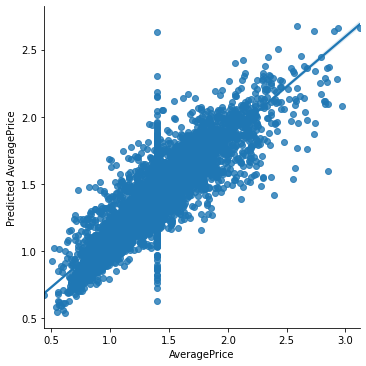

In [188]:
data = pd.DataFrame({'AveragePrice':y_test , 'Predicted AveragePrice':pred},columns=['AveragePrice','Predicted AveragePrice'])
sns.lmplot(x='AveragePrice',y='Predicted AveragePrice',data=data,palette='Greens')
data.head(20)

## Prediction: TotalVolume of avocado sold

In [189]:
X=df_clean.drop(['TotalVolume'],1)
y=df_clean['TotalVolume']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [190]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(X_train,y_train)
pred=RF.predict(X_test)

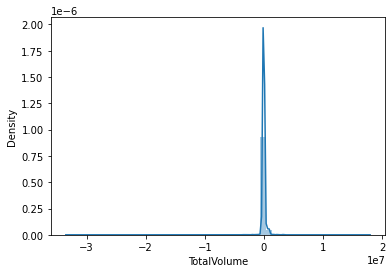

In [195]:
sns.distplot((y_test-pred))

,TotalVolume,Predicted TotalVolume
22511,7.904074e+04,1.153581e+05
5211,1.853952e+05,2.995565e+05
3073,9.170913e+05,1.914299e+05
6234,7.023490e+04,1.204731e+05
6491,1.058089e+06,1.040640e+06
7346,9.170913e+05,1.013151e+05
15874,4.939211e+05,5.020892e+05
3050,1.862590e+05,3.796444e+05
312,4.148248e+04,1.179701e+05
7691,8.893572e+05,8.776083e+05


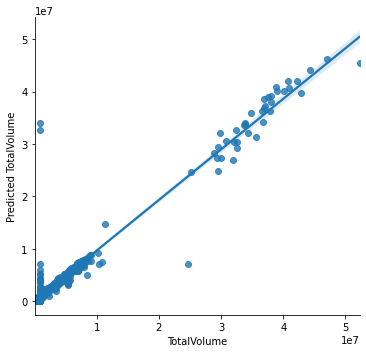

In [196]:
data = pd.DataFrame({'TotalVolume':y_test , 'Predicted TotalVolume':pred},columns=['TotalVolume','Predicted TotalVolume'])
sns.lmplot(x='TotalVolume',y='Predicted TotalVolume',data=data,palette='Greens')
data.head(20)

In [1]:
plt.scatter(df_clean['year'], df_clean['AveragePrice'], color = '#e57373', edgecolor ='black')
plt.xlabel('AveragePrice')
plt.ylabel('year')
plt.title('AveragePrice of avocado from year 2015-2019')

NameError: ignored

## Conclusion

*   2 machine learning model are compared and Random Forest is best fit for our predictions.
*   Predicted average price increase as the actual average price increase.
*   Predicted volume of avocado sold also increase when actual volumes of avocado sold increase.
*   More features to be introduced: weather, region population, market_variety,